
**Comparative Performance Analysis for Predicting Sea Level Rise Using Linear Regression and Support Vector Machine**
Objective:
In this assignment, you will analyze sea level data to predict the rise in sea levels over time using linear regression and support vector machine (SVM). You will perform data cleaning, modeling, and visualize the results. Your predictions will be used to estimate future sea levels.

**Deliverable** Upload your completed code to Canvas within the due date.

Dataset:
The dataset contains historical data on sea level measurements from the CSIRO (Commonwealth Scientific and Industrial Research Organisation). The columns of the dataset are as follows:

-- Year: The year of the measurement.

-- CSIRO Adjusted Sea Level: The adjusted sea level measurement (in millimeters).

-- Lower Error Bound: The lower bound of the sea level measurement.

-- Upper Error Bound: The upper bound of the sea level measurement.

-- NOAA Adjusted Sea Level: The NOAA adjusted sea level (containing missing values).

### Tasks: Write the code for each of the following:

* Task 1: Data Exploration and Preprocessing

-- Load and Explore the Data:

-- Load the dataset into a Pandas DataFrame.

-- Display the first few rows of the dataset to understand its structure.

-- Identify and handle any missing data.

-- Describe the dataset and summarize the statistics:


-- Identify any potential outliers or anomalies in the data.



* Task 2: Focused Prediction from Year 2000 to Present



-- Filter the data from the year 2000 to the most recent year available in the dataset.

-- Shuffle the dataset and Split the dataset into 70% train and 30% test.

-- Fit a linear regression and SVM model based on the 70% of the dataset (from 2000 to the most recent year). Use the SKLearn library.

-- Visualize the observed data and the fitted regression line for this range of years.

-- Display the values of all the weights (coefficients) obtained from Linear Regression and SVM.

* Task 3: Predict Sea Level in 2040 Using the SVM and Linear Regression:

-- Using the linear regression model and SVM (from the year 2000 onwards), predict the sea level rise using the 30% test.

-- Report the predicted sea levels from both the models.

* Task 4: Reflection and Analysis

-- Compare the predicted sea level for 2030  and 2040 from both the models.

-- Discuss how the different models might lead to different predictions and why this is the case.

* Task 5: Interpretation of Results:

-- Report a metric that you used to compare the performance of the Linear Regression and SVM. Which model performed the best?

-- Explain how the regression models are helping us understand the relationship between the year and the sea level rise.



# TASK 1: Data Exploration and Preprocessing

In [3]:
import pandas as pd

# Load and Explore the Data: Load the dataset into a Pandas DataFrame.
df = pd.read_csv('epa-sea-level.csv')
print(df)

# Display the first few rows of the dataset to understand its structure.
print(df.head(5))
print(df.tail(5))

     Year  CSIRO Adjusted Sea Level  Lower Error Bound  Upper Error Bound  \
0    1880                  0.000000          -0.952756           0.952756   
1    1881                  0.220472          -0.732283           1.173228   
2    1882                 -0.440945          -1.346457           0.464567   
3    1883                 -0.232283          -1.129921           0.665354   
4    1884                  0.590551          -0.283465           1.464567   
..    ...                       ...                ...                ...   
129  2009                  8.586614           8.311024           8.862205   
130  2010                  8.901575           8.618110           9.185039   
131  2011                  8.964567           8.661417           9.267717   
132  2012                  9.326772           8.992126           9.661417   
133  2013                  8.980315           8.622047           9.338583   

     NOAA Adjusted Sea Level  
0                        NaN  
1            

In [20]:
# Identify and handle any missing data.
print("Missing values per column:")
print(df.isnull().sum())
df = df[['Year', 'CSIRO Adjusted Sea Level']]
print(df.isnull().sum())
print(df)
df = df.dropna()

df

Missing values per column:
Year                        0
CSIRO Adjusted Sea Level    0
dtype: int64
Year                        0
CSIRO Adjusted Sea Level    0
dtype: int64
     Year  CSIRO Adjusted Sea Level
0    1880                  0.000000
1    1881                  0.220472
2    1882                 -0.440945
3    1883                 -0.232283
4    1884                  0.590551
..    ...                       ...
129  2009                  8.586614
130  2010                  8.901575
131  2011                  8.964567
132  2012                  9.326772
133  2013                  8.980315

[134 rows x 2 columns]


,Year,CSIRO Adjusted Sea Level
0,1880,0.000000
1,1881,0.220472
2,1882,-0.440945
3,1883,-0.232283
4,1884,0.590551
...,...,...
129,2009,8.586614
130,2010,8.901575
131,2011,8.964567
132,2012,9.326772


In [ ]:

#  Describe the dataset and summarize the statistics:
print(df.head())
print(df.describe())

   Year  CSIRO Adjusted Sea Level
0  1880                  0.000000
1  1881                  0.220472
2  1882                 -0.440945
3  1883                 -0.232283
4  1884                  0.590551
              Year  CSIRO Adjusted Sea Level
count   134.000000                134.000000
mean   1946.500000                  3.650341
std      38.826537                  2.485692
min    1880.000000                 -0.440945
25%    1913.250000                  1.632874
50%    1946.500000                  3.312992
75%    1979.750000                  5.587598
max    2013.000000                  9.326772


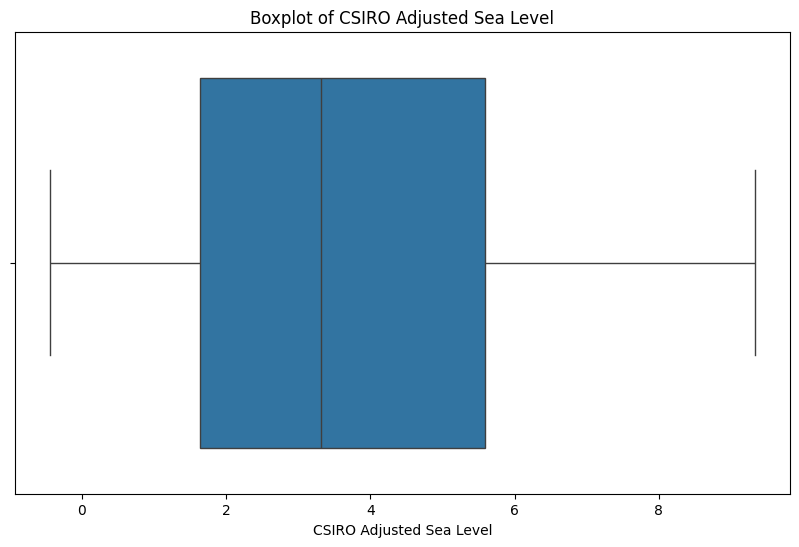

In [ ]:
# Identify any potential outliers or anomalies in the data.
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x=df["CSIRO Adjusted Sea Level"])
plt.title("Boxplot of CSIRO Adjusted Sea Level")
plt.show()

# TASK 2: Focused Prediction from Year 2000 to Present


In [7]:
# Filter the data from the year 2000 to the most recent year available in the dataset.
df_2000 = df[df["Year"] >= 2000].copy()
df_2000


,Year,CSIRO Adjusted Sea Level
120,2000,7.062992
121,2001,7.287402
122,2002,7.381890
123,2003,7.759843
124,2004,7.740157
125,2005,7.744094
126,2006,7.917323
127,2007,7.996063
128,2008,8.350394
129,2009,8.586614


In [8]:
# Shuffle the dataset and Split the dataset into 70% train and 30% test.
from sklearn.model_selection import train_test_split
X = df_2000[["Year"]]
Y = df_2000["CSIRO Adjusted Sea Level"]
x_train, x_test,y_train,y_test = train_test_split(X,Y,train_size=0.7,random_state=0)
x_train
y_train

133    8.980315
129    8.586614
121    7.287402
127    7.996063
130    8.901575
123    7.759843
120    7.062992
125    7.744094
132    9.326772
Name: CSIRO Adjusted Sea Level, dtype: float64

In [9]:
# Fit a linear regression and SVM model based on the 70% of the dataset (from 2000 to the most recent year). Use the SKLearn library.
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)

LinearRegression()

In [10]:
from sklearn.svm import SVR
svm_model = SVR(kernel='linear')
svm_model.fit(x_train, y_train)

SVR(kernel='linear')

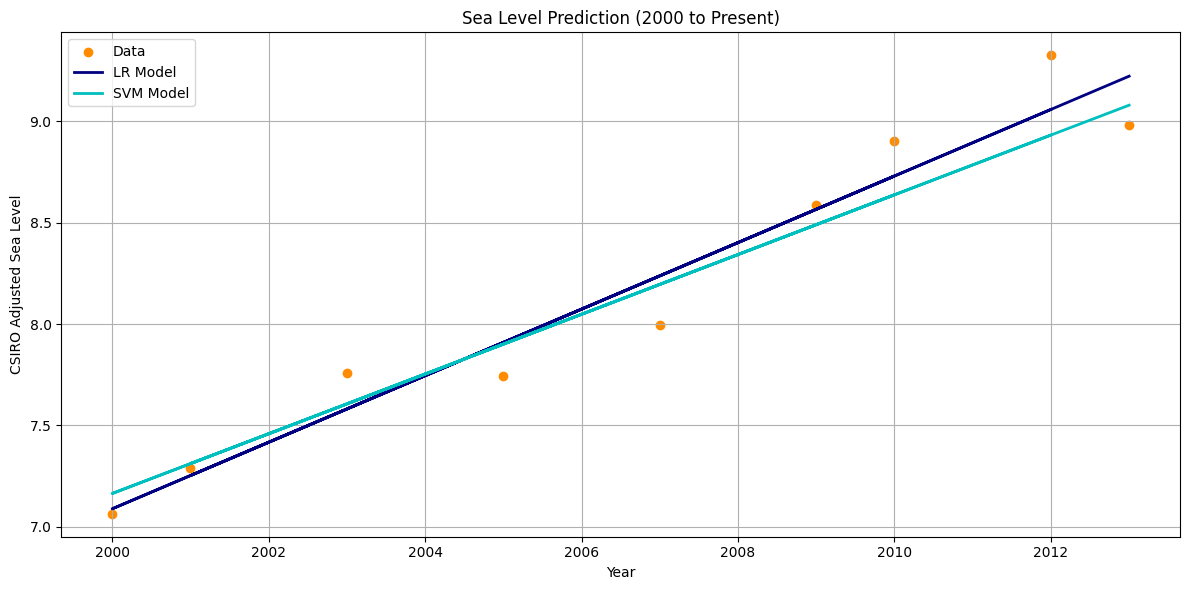

In [11]:
# Visualize the observed data and the fitted regression line for this range of years.

import numpy as np
import matplotlib.pyplot as plt

lr_pred = lr_model.predict(x_train)
svm_pred = svm_model.predict(x_train)


# Plot results
plt.figure(figsize=(12, 6))
plt.scatter(x_train, y_train, color='darkorange', label='Data')
plt.plot(x_train, lr_pred, color='navy', lw=2, label='LR Model')
plt.plot(x_train, svm_pred, color='c', lw=2, label='SVM Model')
#plt.plot(X, y_poly, color='cornflowerblue', lw=2, label='SVR Polynomial')
plt.xlabel("Year")
plt.ylabel("CSIRO Adjusted Sea Level")
plt.title('Sea Level Prediction (2000 to Present)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [12]:
# Display the values of all the weights (coefficients) obtained from Linear Regression and SVM.
print("Linear Regression Coefficients:")
print(f"Slope (Weight): {lr_model.coef_[0]:.4f}")

print("\nSVM Coefficients:")
print(f"Slope (Weight): {svm_model.coef_[0][0]:.4f}")

Linear Regression Coefficients:
Slope (Weight): 0.1643

SVM Coefficients:
Slope (Weight): 0.1475


# TASK 3: Predict Sea Level in 2040 Using the SVM and Linear Regression:

In [13]:
# Using the linear regression model and SVM (from the year 2000 onwards), predict the sea level rise using the 30% test.
lr_pred_test = lr_model.predict(x_test)
svm_pred_test = svm_model.predict(x_test)


In [14]:
# Report the predicted sea levels from both the models.
print("Linear Regression (first 5 predictions):", lr_pred_test[:5])
print("SVM (first 5 predictions):", svm_pred_test[:5])


Linear Regression (first 5 predictions): [8.40194834 8.07330403 7.74465972 8.89491481 7.41601541]
SVM (first 5 predictions): [8.34288309 8.04791035 7.75293761 8.78534221 7.45796486]


# TASK 4: Reflection and Analysis

In [15]:
# Compare the predicted sea level for 2030  and 2040 from both the models.
# Predict sea level in the year 2040

year_2040 = np.array([[2040]])
print(year_2040)
lr_y_2040 = lr_model.predict(year_2040)[0]
svm_y_2040 = svm_model.predict(year_2040)[0]


# Predict sea level in the year 2030
year_2030 = np.array([[2030]])
print(year_2030)
lr_y_2030 = lr_model.predict(year_2030)[0]
svm_y_2030 = svm_model.predict(year_2030)[0]

print(f"Linear Regression Prediction (Sea Levels 2030): {lr_y_2030:.4f} mm")
print(f"SVM Prediction (Sea levels 2030): {svm_y_2030:.4f} mm")

print(f"\nLinear Regression Prediction (Sea Levels 2040): {lr_y_2040:.4f} mm")
print(f"SVM Prediction (Sea levels 2040): {svm_y_2040:.4f} mm")


[[2040]]
[[2030]]
Linear Regression Prediction (Sea Levels 2030): 12.0170 mm
SVM Prediction (Sea levels 2030): 11.5876 mm

Linear Regression Prediction (Sea Levels 2040): 13.6603 mm
SVM Prediction (Sea levels 2040): 13.0624 mm


/home/colin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/colin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(
/home/colin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/home/colin/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


#### Discuss how the different models might lead to different predictions and why this is the case.

Linear regression finds a slope that best has the lowest error. However, averages can be swayed by outliers.

Support Vector Machines (SVMs) finds a line that best separates the data via a maximum margin. 

DIFFERENCES: The difference may be due to how the data is distribued. The SVM is able to be more generalized to outliers while a linear regression can better reflect the trends of the data

# TASK 5: Interpretation of Results:

In [16]:
#  Report a metric that you used to compare the performance of the Linear Regression and SVM. Which model performed the best?

from sklearn.metrics import mean_squared_error, mean_absolute_error

print("TRAINING DATA")
print("Linear Regression (LR)")
mse_lr_train = mean_squared_error(y_train, lr_pred)
rmse_lr_train = np.sqrt(mse_lr_train)
mae_lr_train = mean_absolute_error(y_train, lr_pred)


print(f"Mean Square Error (MSE) (LR): {mse_lr_train:.4f}")
print(f"Root Mean Square Error (RMSE) (LR): {rmse_lr_train:.4f}")
print(f"Mean Absolute Error (MAE) (LR): {mae_lr_train:.4f}")


print("\nSupport Vector Machine (SVM)")
mse_svm_train = mean_squared_error(y_train, svm_pred)
rmse_svm_train = np.sqrt(mse_svm_train)
mae_svm_train = mean_absolute_error(y_train, svm_pred)

print(f"Mean Square Error (MSE) (LR): {mse_svm_train:.4f}")
print(f"Root Mean Square Error (RMSE) (LR): {rmse_svm_train:.4f}")
print(f"Mean Absolute Error (MAE) (LR): {mae_svm_train:.4f}")


TRAINING DATA
Linear Regression (LR)
Mean Square Error (MSE) (LR): 0.0311
Root Mean Square Error (RMSE) (LR): 0.1764
Mean Absolute Error (MAE) (LR): 0.1498

Support Vector Machine (SVM)
Mean Square Error (MSE) (LR): 0.0381
Root Mean Square Error (RMSE) (LR): 0.1951
Mean Absolute Error (MAE) (LR): 0.1652


In [17]:
total_lr_error = mse_lr_train + rmse_lr_train + mae_lr_train
total_svm_error = mse_svm_train + rmse_svm_train + mae_svm_train
print("\ntotal_lr_error", total_lr_error)
print("total_svm_error", total_svm_error)

if total_lr_error < total_svm_error:
    print("The better model is: Linear Regression with total error:", total_lr_error)
else:
    print("The better model is: SVM with total error:", total_svm_error)



total_lr_error 0.35729865334329036
total_svm_error 0.398377741211543
The better model is: Linear Regression with total error: 0.35729865334329036


In [18]:
print("\nTESTING DATA")
print("Linear Regression (LR)")
mse_lr_test = mean_squared_error(y_test, lr_pred_test)
rmse_lr_test = np.sqrt(mse_lr_test)
mae_lr_test = mean_absolute_error(y_test, lr_pred_test)


print(f"Mean Square Error (MSE) (LR): {mse_lr_test:.4f}")
print(f"Root Mean Square Error (RMSE) (LR): {rmse_lr_test:.4f}")
print(f"Mean Absolute Error (MAE) (LR): {mae_lr_test:.4f}")


print("\nSupport Vector Machine (SVM)")
mse_svm_test = mean_squared_error(y_test, svm_pred_test)
rmse_svm_test = np.sqrt(mse_svm_test)
mae_svm_test = mean_absolute_error(y_test, svm_pred_test)

print(f"Mean Square Error (MSE) (LR): {mse_svm_test:.4f}")
print(f"Root Mean Square Error (RMSE) (LR): {rmse_svm_test:.4f}")
print(f"Mean Absolute Error (MAE) (LR): {mae_svm_test:.4f}")



TESTING DATA
Linear Regression (LR)
Mean Square Error (MSE) (LR): 0.0066
Root Mean Square Error (RMSE) (LR): 0.0813
Mean Absolute Error (MAE) (LR): 0.0632

Support Vector Machine (SVM)
Mean Square Error (MSE) (LR): 0.0110
Root Mean Square Error (RMSE) (LR): 0.1051
Mean Absolute Error (MAE) (LR): 0.0812


In [19]:
total_lr_error = mse_lr_test + rmse_lr_test + mae_lr_test
total_svm_error = mse_svm_test + rmse_svm_test+ mae_svm_test
print("\ntotal_lr_error", total_lr_error)
print("total_svm_error", total_svm_error)

if total_lr_error < total_svm_error:
    print("The better model is: Linear Regression with total error:", total_lr_error)
else:
    print("The better model is: SVM with total error:", total_svm_error)


total_lr_error 0.15103827093919958
total_svm_error 0.19732601158070862
The better model is: Linear Regression with total error: 0.15103827093919958


#### Explain how the regression models are helping us understand the relationship between the year and the sea level rise.

Linear regression models provides clear linear relationship (hence linear regression). The slope coefficient indicates the magnitude and direction (positive or negative) of this relationship, helping us understand the rate of change in sea levels over time.